In [132]:
import numpy as np
import pandas as pd

In [133]:
df = pd.read_csv('https://raw.githubusercontent.com/entbappy/End-to-end-Youtube-Sentiment/refs/heads/main/notebooks/reddit_preprocessing.csv')
df.head()

,clean_comment,category
0,family mormon never tried explain still stare ...,1
1,buddhism much lot compatible christianity espe...,1
2,seriously say thing first get complex explain ...,-1
3,learned want teach different focus goal not wr...,0
4,benefit may want read living buddha living chr...,1


In [134]:
df.shape

(36793, 2)

In [135]:
df.sample()['clean_comment'].values

array(['damn bought literally biggest motivation'], dtype=object)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36793 entries, 0 to 36792
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  36662 non-null  object
 1   category       36793 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 575.0+ KB


In [137]:
df.isnull().sum()

,0
clean_comment,131
category,0


In [138]:
df[df['clean_comment'].isna()]

,clean_comment,category
287,NaN,0
821,NaN,0
922,NaN,0
934,NaN,0
1169,NaN,0
...,...,...
36358,NaN,0
36563,NaN,0
36599,NaN,0
36731,NaN,0


In [139]:
df[df['clean_comment'].isna()]['category'].value_counts()

,count
category,
0,128
-1,2
1,1


In [140]:
df.dropna(inplace=True)

In [141]:
df.duplicated().sum()

np.int64(419)

In [142]:
df[df.duplicated()]

,clean_comment,category
1376,jpg,0
1397,good,1
1430,real bhagoda,1
1561,think,0
2340,cringe,0
...,...,...
36751,nice try,1
36768,vote,0
36770,would,0
36776,nice try,1


In [143]:
df.drop_duplicates(inplace=True)

In [144]:
df.duplicated().sum()

np.int64(0)

In [145]:
df[(df['clean_comment'].str.strip() == '')]

,clean_comment,category


In [146]:
df = df[~(df['clean_comment'].str.strip() == '')]

In [147]:
# Convert 'clean_comment' to lower
df['clean_comment'] = df['clean_comment'].str.lower()

df.head()

,clean_comment,category
0,family mormon never tried explain still stare ...,1
1,buddhism much lot compatible christianity espe...,1
2,seriously say thing first get complex explain ...,-1
3,learned want teach different focus goal not wr...,0
4,benefit may want read living buddha living chr...,1


In [148]:
df[df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' '))]

,clean_comment,category


In [149]:
# Remove whitespaces from 'clean_comment'
df['clean_comment'] = df['clean_comment'].str.strip()

# Verify by checking for any remaining trailing whitespaces
df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' ')).sum()

np.int64(0)

In [150]:
# Identify comments containing URLs
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
comments_with_urls = df[df['clean_comment'].str.contains(url_pattern, regex=True)]

comments_with_urls.head()

,clean_comment,category


In [151]:
# Identify comments containing new line characters
comments_with_newline = df[df['clean_comment'].str.contains('\n')]

comments_with_newline.head()

,clean_comment,category


In [152]:
# Remove new line characters
df['clean_comment'] = df['clean_comment'].str.replace('\n', ' ', regex=True)

# Verify
comments_with_newline_remaining = df[df['clean_comment'].str.contains('\n')]
comments_with_newline_remaining

,clean_comment,category


## EDA

<Axes: xlabel='category', ylabel='count'>

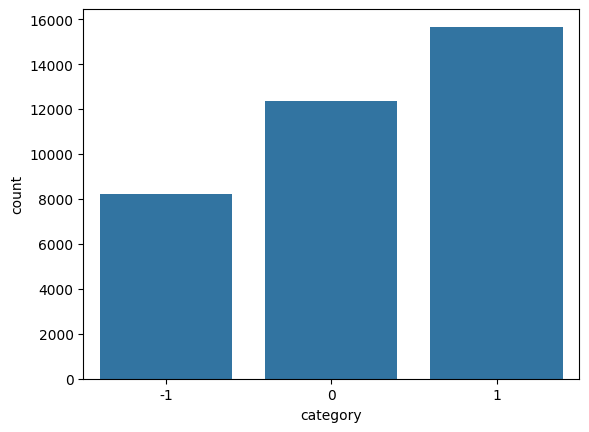

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt

# distribution of classes

sns.countplot(data=df, x='category')

In [154]:
# frequency distribution of sentiments

df['category'].value_counts(normalize=True).mul(100).round(2)

,proportion
category,
1,43.22
0,34.15
-1,22.63


In [155]:
df['word_count'] = df['clean_comment'].apply(lambda x: len(x.split()))

In [156]:
df.sample(5)

,clean_comment,category,word_count
29775,sound like entered eight level jhana,0,6
25381,one others blessed,1,3
33991,also 2004 2017 vikas,0,4
5640,merkel visiting india not making much headline...,1,28
29321,rss good but part like vhp bajrang dal bad yea...,-1,16


In [157]:
df['word_count'].describe()

,word_count
count,36243.000000
mean,20.370085
std,39.298392
min,1.000000
25%,5.000000
50%,9.000000
75%,21.000000
max,893.000000


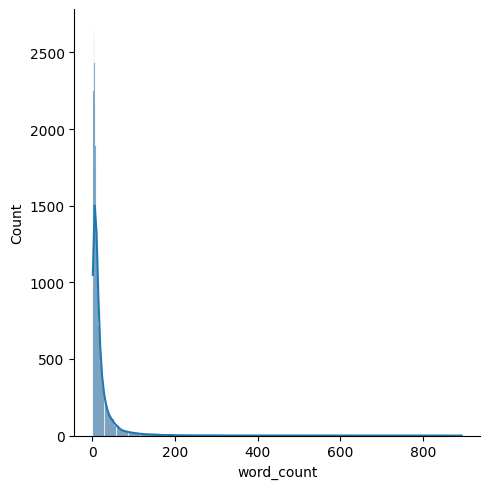

In [158]:
sns.displot(df['word_count'], kde=True)

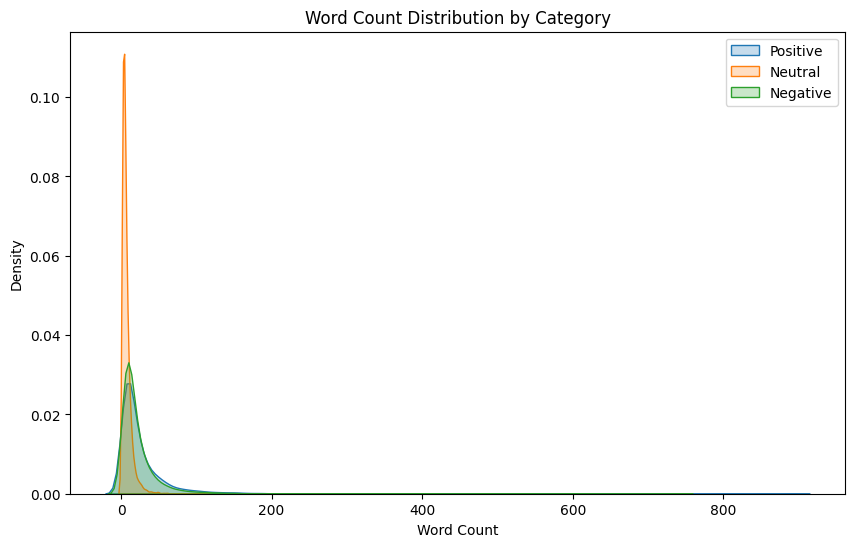

In [159]:
# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot KDE for category 1
sns.kdeplot(df[df['category'] == 1]['word_count'], label='Positive', fill=True)

# Plot KDE for category 0
sns.kdeplot(df[df['category'] == 0]['word_count'], label='Neutral', fill=True)

# Plot KDE for category -1
sns.kdeplot(df[df['category'] == -1]['word_count'], label='Negative', fill=True)

# Add title and labels
plt.title('Word Count Distribution by Category')
plt.xlabel('Word Count')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()

<Axes: ylabel='word_count'>

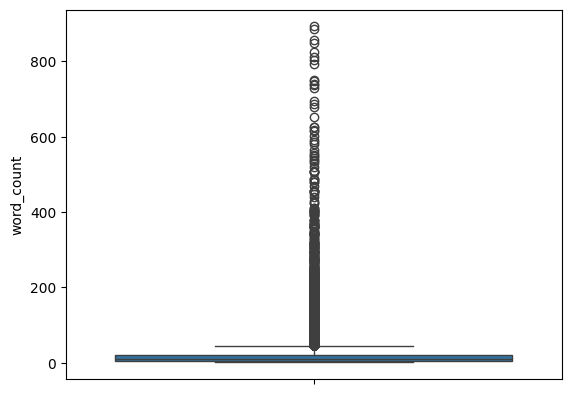

In [160]:
sns.boxplot(df['word_count'])

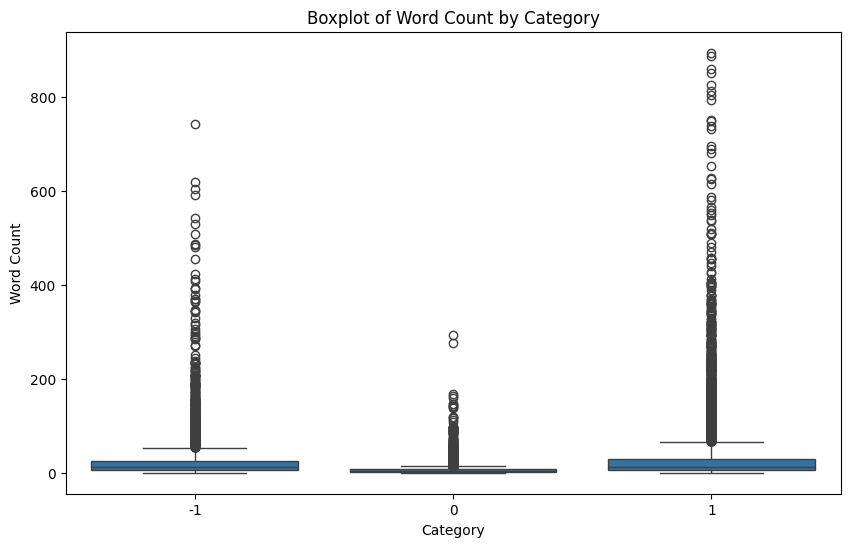

In [161]:
# Create a boxplot for the 'wordcount' column categorized by 'category'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='category', y='word_count')
plt.title('Boxplot of Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

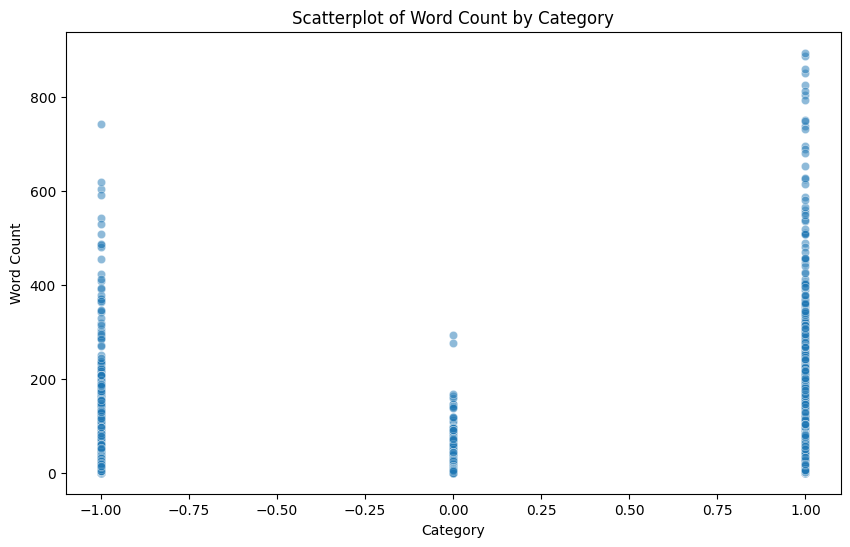

In [162]:
# Create a scatterplot between 'category' and 'wordcount'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='category', y='word_count', alpha=0.5)
plt.title('Scatterplot of Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

<Axes: xlabel='category', ylabel='word_count'>

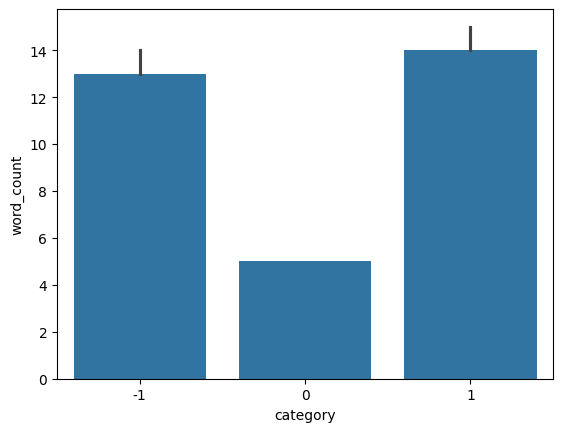

In [163]:
# median word counts among sentiments

sns.barplot(df,x='category',y='word_count',estimator='median')

In [164]:
!pip install nltk

In [165]:
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')

# Define list of English stopwords
stop_words = set(stopwords.words('english'))

# create new column 'num_stop_words' by counti ng no. of stopwords in each comment
df['num_stop_words'] = df['clean_comment'].apply(lambda x: len([word for word in x.split() if word in stop_words]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [166]:
df.sample(5)

,clean_comment,category,word_count,num_stop_words
18740,rss around stop history lesson tell,0,6,0
13754,surprised upa scheme renamed marketed nda bjp ...,1,11,0
17715,lol aussie thread trying tell rohit dhawan pla...,1,11,0
35673,forehead big enough airport,0,4,0
26071,hahaha pegou lembrando que ma no mais feliz natal,1,9,2


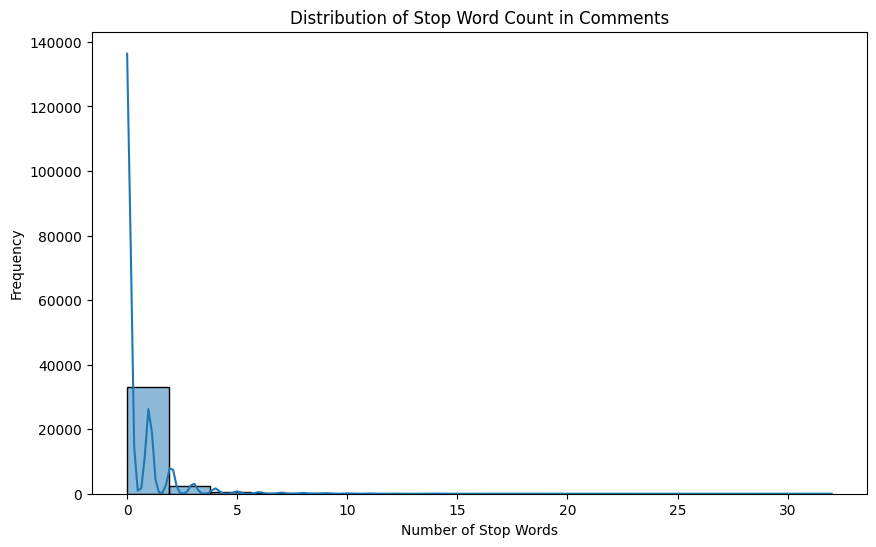

In [167]:
# Create a distribution plot (displot) for the 'num_stop_words' column
plt.figure(figsize=(10, 6))
sns.histplot(df['num_stop_words'], kde=True)
plt.title('Distribution of Stop Word Count in Comments')
plt.xlabel('Number of Stop Words')
plt.ylabel('Frequency')
plt.show()

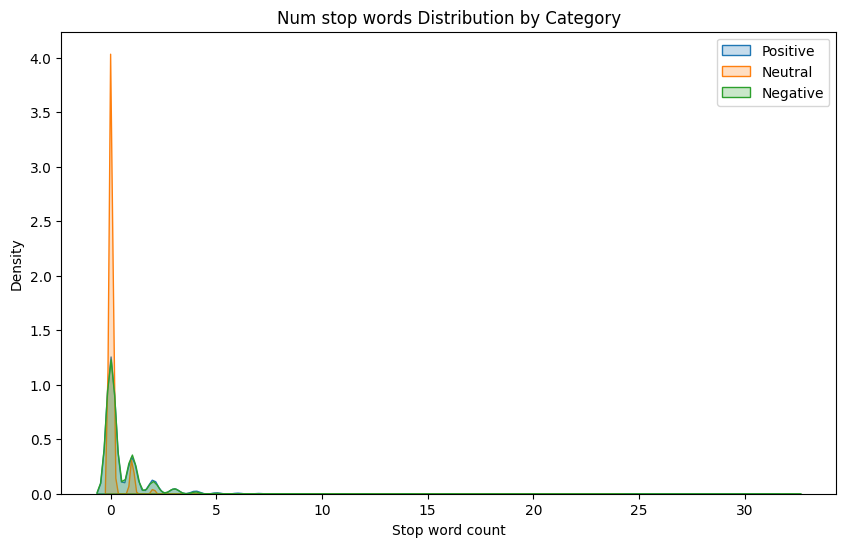

In [168]:
# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot KDE for category 1
sns.kdeplot(df[df['category'] == 1]['num_stop_words'], label='Positive', fill=True)

# Plot KDE for category 0
sns.kdeplot(df[df['category'] == 0]['num_stop_words'], label='Neutral', fill=True)

# Plot KDE for category -1
sns.kdeplot(df[df['category'] == -1]['num_stop_words'], label='Negative', fill=True)

# Add title and labels
plt.title('Num stop words Distribution by Category')
plt.xlabel('Stop word count')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()

/tmp/ipython-input-169-1290522852.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_df, x='count', y='stop_word', palette='viridis')


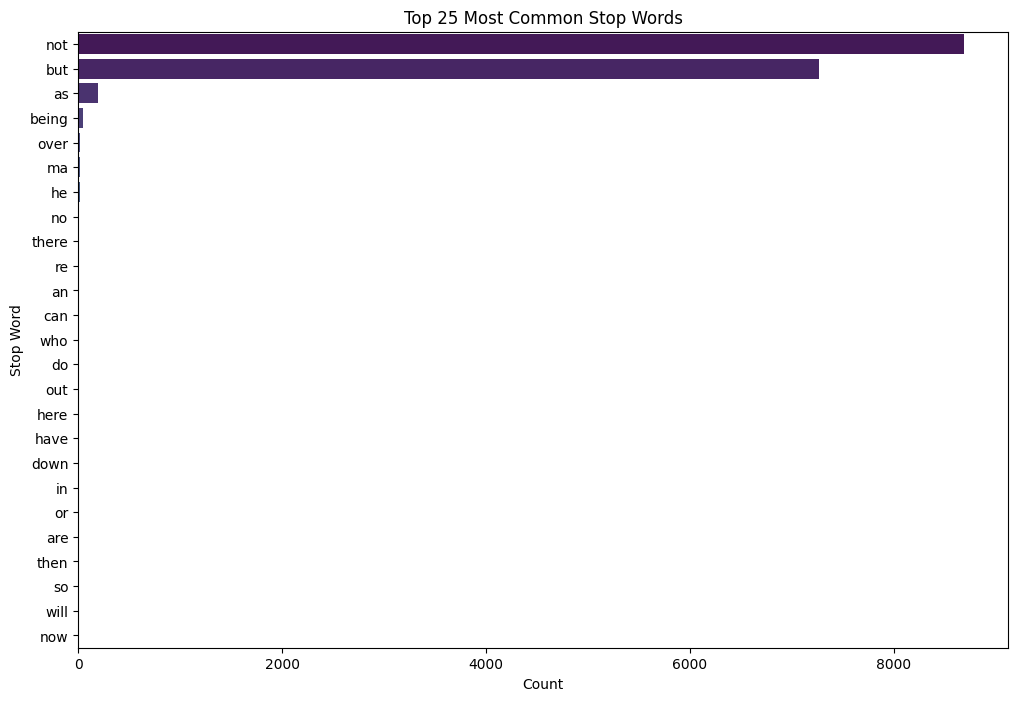

In [169]:

# Create a frequency distribution of stop words in the 'clean_comment' column
from collections import Counter

# Extract all stop words from the comments using the previously defined 'common_stopwords'
all_stop_words = [word for comment in df['clean_comment'] for word in comment.split() if word in stop_words]

# Count the most common stop words
most_common_stop_words = Counter(all_stop_words).most_common(25)

# Convert the most common stop words to a DataFrame for plotting
top_25_df = pd.DataFrame(most_common_stop_words, columns=['stop_word', 'count'])

# Create the barplot for the top 25 most common stop words
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_df, x='count', y='stop_word', palette='viridis')
plt.title('Top 25 Most Common Stop Words')
plt.xlabel('Count')
plt.ylabel('Stop Word')
plt.show()



In [170]:
df['num_chars'] = df['clean_comment'].apply(len)

df.head()

,clean_comment,category,word_count,num_stop_words,num_chars
0,family mormon never tried explain still stare ...,1,26,0,196
1,buddhism much lot compatible christianity espe...,1,140,3,981
2,seriously say thing first get complex explain ...,-1,46,0,275
3,learned want teach different focus goal not wr...,0,15,1,101
4,benefit may want read living buddha living chr...,1,68,1,473


In [172]:
df['num_chars'].describe()

,num_chars
count,36243.000000
mean,137.249510
std,275.903402
min,2.000000
25%,30.000000
50%,62.000000
75%,138.000000
max,6583.000000


In [173]:
# Combine all comments into large string
all_text = ' '.join(df['clean_comment'])

# Count the frequency of each character
char_frequency = Counter(all_text)

# Convert Char freq into dataframe
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)

In [174]:
char_frequency_df['character'].values

array([' ', 'e', 'a', 'i', 't', 'n', 'o', 'r', 's', 'l', 'd', 'c', 'm',
       'p', 'u', 'g', 'h', 'y', 'b', 'k', 'w', 'f', 'v', 'j', 'x', '0',
       'z', 'q', '1', '2', '9', '5', '3', '4', '6', '7', '8'],
      dtype=object)

In [175]:
char_frequency_df.tail(50)

,character,frequency
6,,738272
10,e,494884
1,a,365250
3,i,342812
12,t,322572
9,n,317572
7,o,290894
8,r,268331
16,s,223259
4,l,217592


In [176]:
# Create a new column 'num_punctuation_chars' to count punctuation characters in each comment
df['num_punctuation_chars'] = df['clean_comment'].apply(
    lambda x: sum([1 for char in x if char in '.,!?;:"\'()[]{}-'])
)

df.sample(5)

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
10859,let guess jandhan account holder get rs10000 d...,1,32,0,220,0
4398,nice,1,1,0,4,0
28758,seems like tension going bit wish guy luck,-1,8,0,42,0
16414,posting big til vijay huge star crore fan fact...,1,13,0,78,0
30638,like seeing someone 100 time anyone ask apna b...,0,10,0,53,0


In [177]:
df['num_punctuation_chars'].describe()

,num_punctuation_chars
count,36243.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


/tmp/ipython-input-179-479770857.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top_25_bigrams_df, x = 'count', y = 'bigram', palette = 'magma')


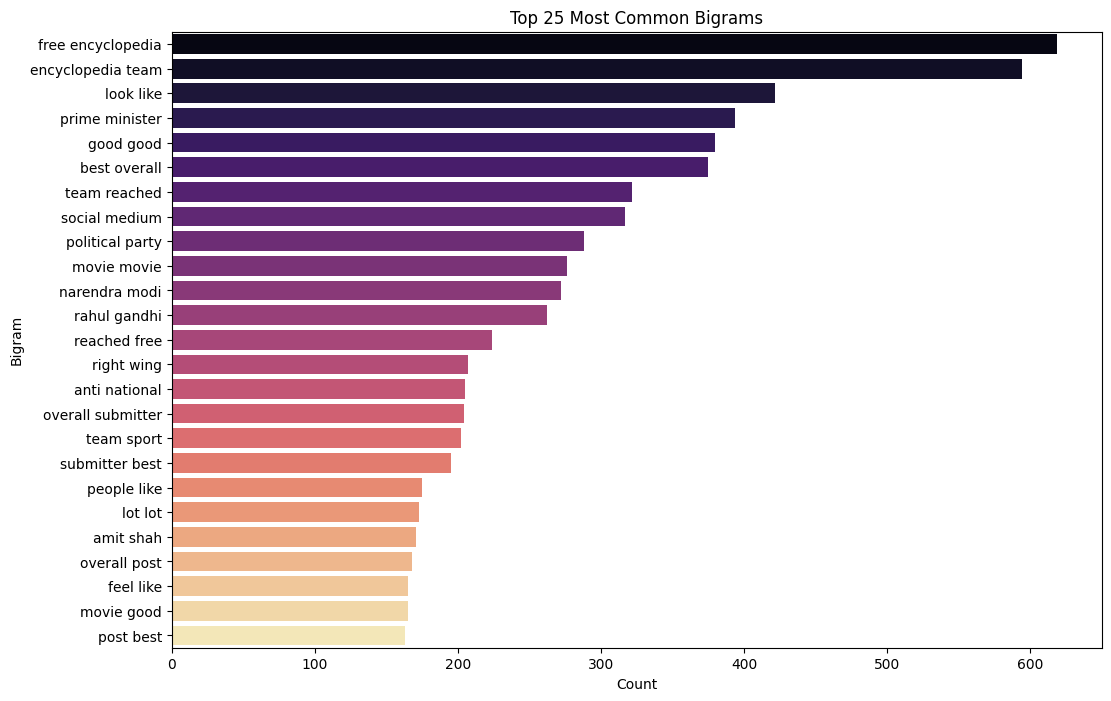

In [179]:
from sklearn.feature_extraction.text import CountVectorizer

# create a function to extract the top 25 bigrams
def get_top_ngrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

# top 25 bigrams
top_25_bigrams = get_top_ngrams(df['clean_comment'], 25)

top_25_bigrams_df = pd.DataFrame(top_25_bigrams, columns=['bigram', 'count'])

#Plots
plt.figure(figsize=(12,8))
sns.barplot(data = top_25_bigrams_df, x = 'count', y = 'bigram', palette = 'magma')
plt.title('Top 25 Most Common Bigrams')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.show()

/tmp/ipython-input-180-2492861520.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_trigrams_df, x='count', y='trigram', palette='coolwarm')


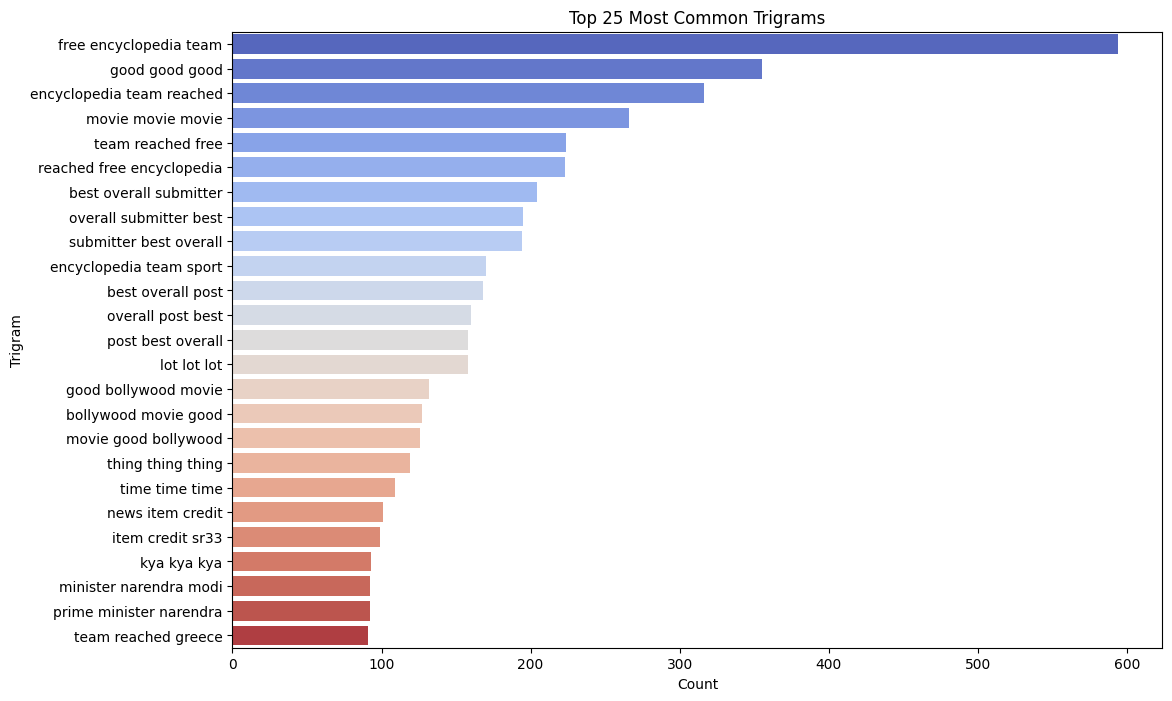

In [180]:
# Create a function to extract the top 25 trigrams
def get_top_trigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 25 trigrams
top_25_trigrams = get_top_trigrams(df['clean_comment'], 25)

# Convert the trigrams into a DataFrame for plotting
top_25_trigrams_df = pd.DataFrame(top_25_trigrams, columns=['trigram', 'count'])

# Plot the countplot for the top 25 trigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_trigrams_df, x='count', y='trigram', palette='coolwarm')
plt.title('Top 25 Most Common Trigrams')
plt.xlabel('Count')
plt.ylabel('Trigram')
plt.show()

In [181]:
# Remove non-English characters from the 'clean_comment' column
# Keeping only standard English letters, digits, and common punctuation

import re

df['clean_comment'] = df['clean_comment'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s!?.,]', '', str(x)))

In [182]:
all_text = ' '.join(df['clean_comment'])

# Count the frequency of each character
char_frequency = Counter(all_text)

# Convert the character frequency into a DataFrame for better display
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)

char_frequency_df

,character,frequency
6,,738272
10,e,494884
1,a,365250
3,i,342812
12,t,322572
9,n,317572
7,o,290894
8,r,268331
16,s,223259
4,l,217592


In [183]:
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon never tried explain still stare ...,1,26,0,196,0
1,buddhism much lot compatible christianity espe...,1,140,3,981,0
2,seriously say thing first get complex explain ...,-1,46,0,275,0
3,learned want teach different focus goal not wr...,0,15,1,101,0
4,benefit may want read living buddha living chr...,1,68,1,473,0


In [184]:
from nltk.corpus import stopwords

# Defining stop words but keeping essential ones for sentiment analysis
stop_words = set(stopwords.words('english')) - {'not', 'but', 'however', 'no', 'yet'}

# Remove stop words from 'clean_comment'
df['clean_comment'] = df['clean_comment'].apply(
    lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words])
)

In [185]:
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon never tried explain still stare ...,1,26,0,196,0
1,buddhism much lot compatible christianity espe...,1,140,3,981,0
2,seriously say thing first get complex explain ...,-1,46,0,275,0
3,learned want teach different focus goal not wr...,0,15,1,101,0
4,benefit may want read living buddha living chr...,1,68,1,473,0


In [187]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

# Define lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to 'cleam_comment_no_stopwords' column
df['clean_comment'] = df['clean_comment'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()])
)

df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon never tried explain still stare ...,1,26,0,196,0
1,buddhism much lot compatible christianity espe...,1,140,3,981,0
2,seriously say thing first get complex explain ...,-1,46,0,275,0
3,learned want teach different focus goal not wr...,0,15,1,101,0
4,benefit may want read living buddha living chr...,1,68,1,473,0


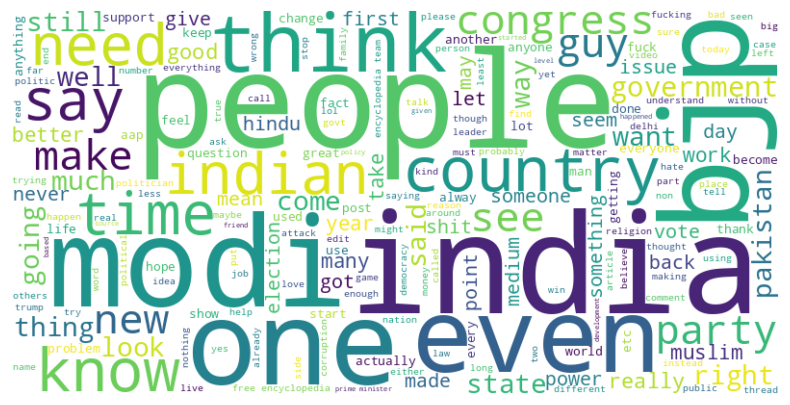

In [188]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

plot_word_cloud(df['clean_comment'])

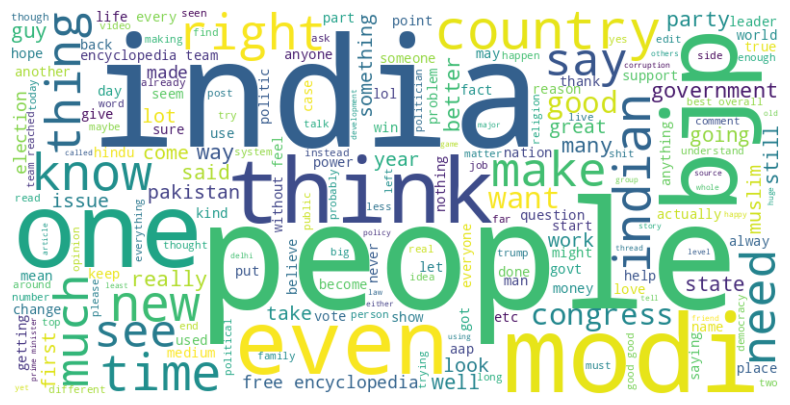

In [189]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['category'] == 1]['clean_comment'])

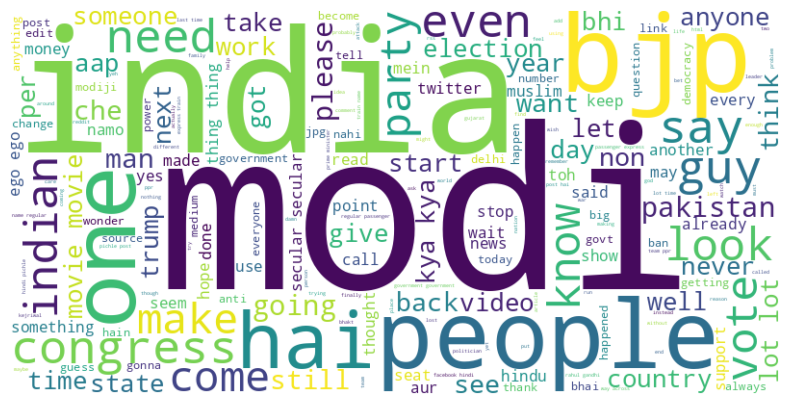

In [190]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['category'] == 0]['clean_comment'])

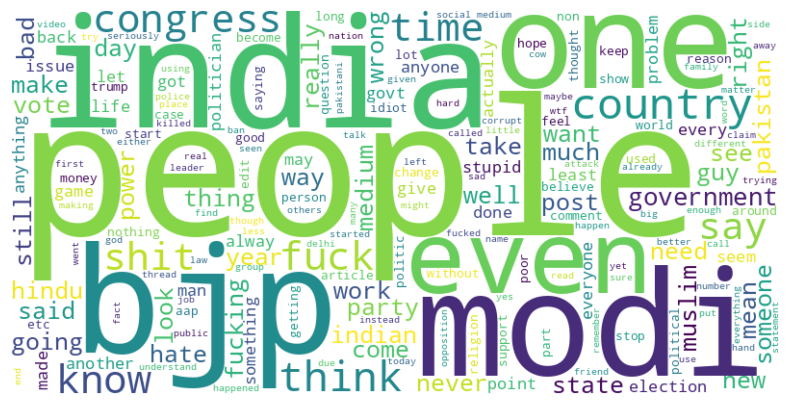

In [191]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df[df['category'] == -1]['clean_comment'])

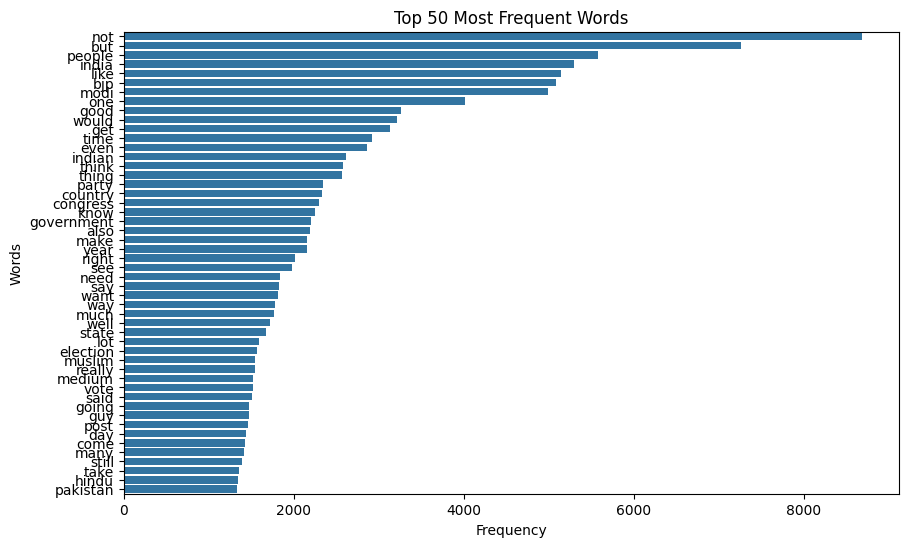

In [192]:
def plot_top_n_words(df, n=20):
    """Plot the top N most frequent words in the dataset."""

    # Flatten all words in the content column
    words = ' '.join(df['clean_comment']).split()

    # Get the top N most common words
    counter = Counter(words)
    most_common_words = counter.most_common(n)

    # Split the words and their counts for plotting
    words, counts = zip(*most_common_words)

    # Plot the top N words
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(f'Top {n} Most Frequent Words')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

# Example usage
plot_top_n_words(df, n=50)

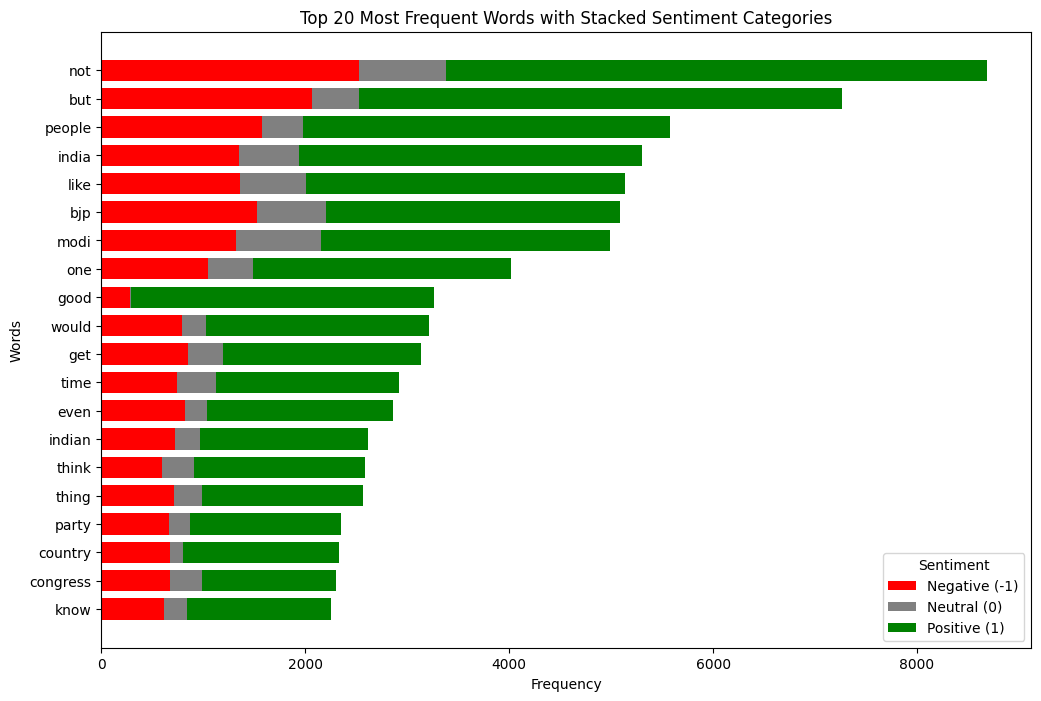

In [194]:
def plot_top_n_words_by_category(df, n=20, start=0):
    """Plot the top N most frequent words in the dataset with stacked hue based on sentiment category."""
    # Flatten all words in the content column and count their occurrences by category
    word_category_counts = {}

    for idx, row in df.iterrows():
        words = row['clean_comment'].split()
        category = row['category']

        for word in words:
            if word not in word_category_counts:
                word_category_counts[word] = {-1: 0, 0: 0, 1: 0} # Initialize counts for each

            # Increment the count for the corresponding sentiment category
            word_category_counts[word][category] += 1

    # Get total counts across all categories for each word
    total_word_counts = {word: sum(counts.values()) for word, counts in word_category_counts.items()}

    # Get top N most frequent words across all categories
    most_common_words = sorted(total_word_counts.items(), key=lambda x: x[1], reverse=True)[start: start + n]
    top_words = [word for word, _ in most_common_words]

    # Prepare data for plotting
    word_labels = top_words
    negative_counts = [word_category_counts[word][-1] for word in top_words]
    neutral_counts = [word_category_counts[word][0] for word in top_words]
    positive_counts = [word_category_counts[word][1] for word in top_words]

    # Plot the stacked bar chart
    plt.figure(figsize=(12, 8))
    bar_width = 0.75

    # Plot negative, neutral, and positive counts in a stacked manner
    plt.barh(word_labels, negative_counts, color='red', label='Negative (-1)', height=bar_width)
    plt.barh(word_labels, neutral_counts, left=negative_counts, color='gray', label='Neutral (0)', height=bar_width)
    plt.barh(word_labels, positive_counts, left=[i+j for i,j in zip(negative_counts, neutral_counts)], color='green', label='Positive (1)', height=bar_width)

    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f'Top {n} Most Frequent Words with Stacked Sentiment Categories')
    plt.legend(title='Sentiment', loc='lower right')
    plt.gca().invert_yaxis()  # Invert y-axis to show the highest frequency at the top
    plt.show()

plot_top_n_words_by_category(df, n=20)